In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
data = engine.execute("SELECT * FROM station")
# reflect the tables
for item in data:
    print(item)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [7]:
# View all of the classes that automap found
base = automap_base()
base.prepare(engine,reflect=True)
base.classes

for item in base.classes:
    print(item)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [8]:
# Save references to each table
Station = base.classes.station
Measurement = base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

max = session.query(func.max(Measurement.date)).first()
print(max)

('2017-08-23',)


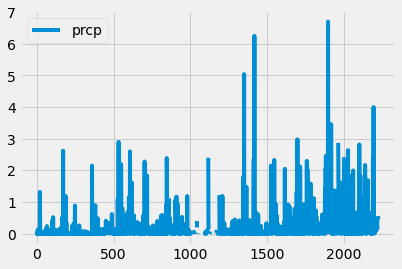

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.



# Calculate the date one year from the last date in data set.

cutoff = dt.datetime(2016,8,23)

# Perform a query to retrieve the data and precipitation scores

prcpData = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= cutoff).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcpDf = pd.DataFrame(prcpData)
prcpDf.set_index("date")
# Sort the dataframe by date
prcpDf.sort_values(["date","prcp"])

# Use Pandas Plotting with Matplotlib to plot the data
prcpDf.plot()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset

data = engine.execute("SELECT * FROM station")
# reflect the tables
for item in data:
    print(item)

# prcpData = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= cutoff).all()
totalStations = session.query(func.count(Station.station)).first()
print(totalStations)


(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(9,)


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


Activestations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(Activestations)




[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
id = Activestations[0][0]
minTemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == id).first()
maxTemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == id).first()
avgTemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == id).first()
print(id)
print(minTemp)
print(maxTemp)
print(avgTemp)

USC00519281
(54.0,)
(85.0,)
(71.66378066378067,)


In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

lastDate = dt.datetime(2017,7,9)

session.query(Measurement.tobs).filter(Measurement.station == id).filter(Measurement.date >= lastDate).limit(12).all()


[(69.0),
 (72.0),
 (74.0),
 (74.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0)]

# Close session

In [ ]:
# Close Session
session.close()